In [355]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


file_path = 'BankPrediction.csv'
bank_data = pd.read_csv(file_path)


label_encoders = {
    "country": LabelEncoder(),
    "gender": LabelEncoder()
}

for col, le in label_encoders.items():
    bank_data[col] = le.fit_transform(bank_data[col])

display(bank_data)

X = bank_data.drop(columns=['churn'])
y = bank_data['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", report_log_reg)


print("Правильність на train фреймі: {:.3f}".format(log_reg_model.score(X_train, y_train)))
print("Правильність на test фреймі: {:.3f}".format(log_reg_model.score(X_test, y_test)))

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Accuracy: 0.817
Confusion Matrix:
 [[2349   67]
 [ 482  102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000

Правильність на train фреймі: 0.804
Правильність на test фреймі: 0.817


In [356]:
y_proba = log_reg_model.predict_proba(X_test)

y_proba_class_0 = y_proba[:, 0] * 100

test_data_with_proba = pd.DataFrame(X_test, columns=bank_data.drop(columns=['churn']).columns)
test_data_with_proba['True Class'] = y_test.values
test_data_with_proba['Predicted Class'] = y_pred_log_reg
test_data_with_proba['Probability of Class 0 (%)'] = y_proba_class_0

print(test_data_with_proba[['True Class', 'Predicted Class', 'Probability of Class 0 (%)']].head())
display(test_data_with_proba.head())


   True Class  Predicted Class  Probability of Class 0 (%)
0           0                0                   82.706449
1           0                0                   92.005072
2           0                0                   64.868142
3           0                0                   65.795296
4           0                0                   90.536196


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,True Class,Predicted Class,Probability of Class 0 (%)
0,-0.041931,-0.583617,0.302012,0.910554,-0.656750,-0.688948,0.324894,0.819663,-1.548034,-1.030169,-1.023964,0,0,82.706449
1,0.648034,-0.303026,-0.903282,0.910554,0.390286,-1.382503,-1.222055,0.819663,0.645981,0.970714,0.790096,0,0,92.005072
2,0.435582,-0.531655,1.507307,-1.098232,0.485471,-0.342170,-1.222055,0.819663,0.645981,-1.030169,-0.733048,0,0,64.868142
3,0.999091,-1.518919,0.302012,0.910554,1.913248,1.044940,0.683891,0.819663,0.645981,0.970714,1.211571,0,0,65.795296
4,-0.580196,-0.957737,1.507307,-1.098232,-1.132675,0.698162,0.777369,-0.903352,0.645981,0.970714,0.240116,0,0,90.536196


In [357]:
coefficients = pd.DataFrame({
    'Feature': bank_data.drop(columns=['churn']).columns,
    'Coefficient': log_reg_model.coef_[0]
})

coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=False)

print(coefficients)


             Feature  Coefficient  Importance
4                age     0.749484    0.749484
9      active_member    -0.524867    0.524867
6            balance     0.309435    0.309435
3             gender    -0.270023    0.270023
2            country     0.090409    0.090409
1       credit_score    -0.071901    0.071901
5             tenure    -0.057732    0.057732
8        credit_card    -0.024389    0.024389
7    products_number    -0.011319    0.011319
10  estimated_salary     0.006026    0.006026
0        customer_id    -0.003258    0.003258


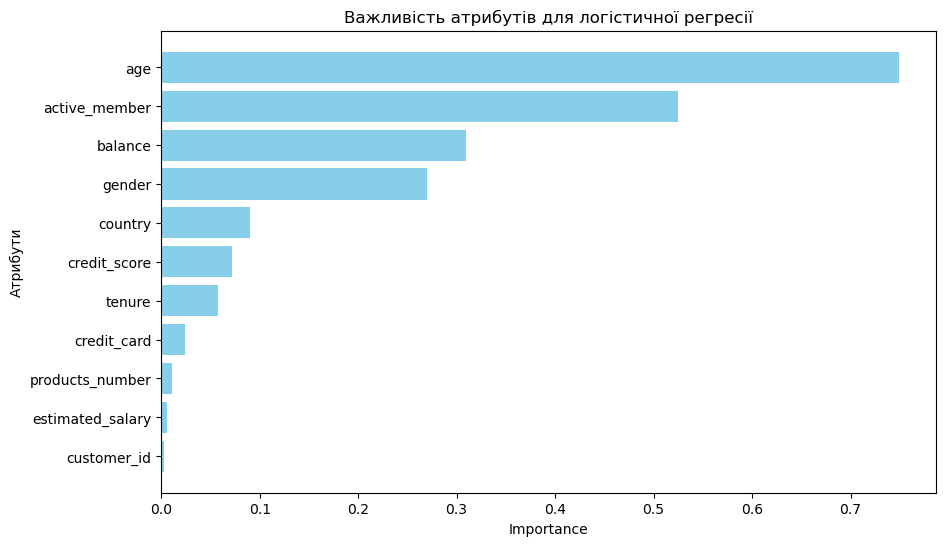

In [358]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Importance'], color='skyblue')
plt.title('Важливість атрибутів для логістичної регресії')
plt.xlabel('Importance')
plt.ylabel('Атрибути')
plt.gca().invert_yaxis()
plt.show()


In [359]:
class_counts = y_train.value_counts()
class_counts

churn
0    5547
1    1453
Name: count, dtype: int64

In [360]:
churn_counts = bank_data['churn'].value_counts()

churn_counts

churn
0    7963
1    2037
Name: count, dtype: int64

In [361]:
important_features = coefficients[coefficients['Importance'] > 0.1]['Feature'].tolist()
print(important_features)

X_train_important = pd.DataFrame(X_train, columns=bank_data.drop(columns=['churn']).columns)[important_features]
X_test_important = pd.DataFrame(X_test, columns=bank_data.drop(columns=['churn']).columns)[important_features]
display(X_train_important)

log_reg_model_important = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model_important.fit(X_train_important, y_train)

y_pred_important = log_reg_model_important.predict(X_test_important)

accuracy_log_reg = accuracy_score(y_test, y_pred_important)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_important)
report_log_reg = classification_report(y_test, y_pred_important)

print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", report_log_reg)


['age', 'active_member', 'balance', 'gender']


,age,active_member,balance,gender
0,-0.656750,0.970714,1.583725,-1.098232
1,-0.466380,0.970714,1.344106,-1.098232
2,-0.561565,-1.030169,-1.222055,0.910554
3,0.199916,0.970714,-0.618965,0.910554
4,-0.180824,0.970714,1.152808,0.910554
...,...,...,...,...
6995,1.437322,0.970714,-0.106936,0.910554
6996,1.818063,0.970714,-1.222055,-1.098232
6997,-0.085639,-1.030169,-1.222055,-1.098232
6998,0.390286,-1.030169,1.820806,0.910554


Accuracy: 0.815
Confusion Matrix:
 [[2345   71]
 [ 484  100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.58      0.17      0.26       584

    accuracy                           0.81      3000
   macro avg       0.71      0.57      0.58      3000
weighted avg       0.78      0.81      0.77      3000



In [362]:
y_proba_important = log_reg_model_important.predict_proba(X_test_important)
y_proba_class_0_important = y_proba_important[:, 0] * 100 

test_data_with_proba_important = pd.DataFrame(X_test_important, columns=important_features)
test_data_with_proba_important['True Class'] = y_test.values
test_data_with_proba_important['Predicted Class'] = log_reg_model_important.predict(X_test_important)
test_data_with_proba_important['Probability of Class 0 (%)'] = y_proba_class_0_important

print(test_data_with_proba_important[['True Class', 'Predicted Class', 'Probability of Class 0 (%)']].head())
display(test_data_with_proba_important.head())

   True Class  Predicted Class  Probability of Class 0 (%)
0           0                0                   84.415217
1           0                0                   91.978764
2           0                0                   68.622375
3           0                0                   66.693282
4           0                0                   91.772890


,age,active_member,balance,gender,True Class,Predicted Class,Probability of Class 0 (%)
0,-0.656750,-1.030169,0.324894,0.910554,0,0,84.415217
1,0.390286,0.970714,-1.222055,0.910554,0,0,91.978764
2,0.485471,-1.030169,-1.222055,-1.098232,0,0,68.622375
3,1.913248,0.970714,0.683891,0.910554,0,0,66.693282
4,-1.132675,0.970714,0.777369,-1.098232,0,0,91.772890


In [363]:
scaler_important = StandardScaler()
scaler_important.fit(X_train_important) 

mean_sample = pd.DataFrame([X_train_important.mean()], columns=important_features)
display(mean_sample)


mean_sample_original = pd.DataFrame(
    scaler_important.inverse_transform(mean_sample), columns=important_features
)

mean_sample_original['age'] -= 1

mean_sample_scaled = pd.DataFrame(
    scaler_important.transform(mean_sample_original), columns=important_features
)

base_proba_class_0 = log_reg_model_important.predict_proba(mean_sample)[0, 0] * 100
print(f"Базова ймовірність (клас 0): {base_proba_class_0:.2f}%")

new_proba_class_0 = log_reg_model_important.predict_proba(mean_sample_scaled)[0, 0] * 100
print(f"Нова ймовірність (клас 0) після зміни 'age': {new_proba_class_0:.2f}%")

delta_proba = new_proba_class_0 - base_proba_class_0
print(f"Зміна ймовірності після зміни 'age': {delta_proba:.2f}%")


,age,active_member,balance,gender
0,-3.243120e-16,-1.583495e-16,-1.431236e-16,7.917476e-17


Базова ймовірність (клас 0): 83.12%
Нова ймовірність (клас 0) після зміни 'age': 91.25%
Зміна ймовірності після зміни 'age': 8.13%


In [364]:
scaler_important = StandardScaler()
scaler_important.fit(X_train_important)

mean_sample = pd.DataFrame([X_train_important.mean()], columns=important_features)
display(mean_sample)

mean_sample_original = pd.DataFrame(
    scaler_important.inverse_transform(mean_sample), columns=important_features
)

mean_sample_original['age'] += 1

mean_sample_scaled = pd.DataFrame(
    scaler_important.transform(mean_sample_original), columns=important_features
)

base_proba_class_0 = log_reg_model_important.predict_proba(mean_sample)[0, 0] * 100
print(f"Базова ймовірність (клас 0): {base_proba_class_0:.2f}%")

new_proba_class_0 = log_reg_model_important.predict_proba(mean_sample_scaled)[0, 0] * 100
print(f"Нова ймовірність (клас 0) після зміни 'age': {new_proba_class_0:.2f}%")

delta_proba = new_proba_class_0 - base_proba_class_0
print(f"Зміна ймовірності після зміни 'age': {delta_proba:.2f}%")


,age,active_member,balance,gender
0,-3.243120e-16,-1.583495e-16,-1.431236e-16,7.917476e-17


Базова ймовірність (клас 0): 83.12%
Нова ймовірність (клас 0) після зміни 'age': 69.92%
Зміна ймовірності після зміни 'age': -13.19%


In [365]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

log_reg_model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

log_reg_model_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = log_reg_model_balanced.predict(X_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)

print("Accuracy після балансування:", accuracy_balanced)
print("Confusion Matrix після балансування:\n", conf_matrix_balanced)
print("Classification Report після балансування:\n", report_balanced)

Accuracy після балансування: 0.7023333333333334
Confusion Matrix після балансування:
 [[1715  701]
 [ 192  392]]
Classification Report після балансування:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.67      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.69      0.63      3000
weighted avg       0.79      0.70      0.73      3000



In [366]:
y_proba = log_reg_model_balanced.predict_proba(X_test)

test_data_with_proba = pd.DataFrame(X_test, columns=bank_data.drop(columns=['churn']).columns)
test_data_with_proba['True Class'] = y_test.values
test_data_with_proba['Predicted Class'] = y_pred_balanced
test_data_with_proba['Probability of Class 0 (%)'] = y_proba[:, 0] * 100


display(test_data_with_proba.head())


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,True Class,Predicted Class,Probability of Class 0 (%)
0,-0.041931,-0.583617,0.302012,0.910554,-0.656750,-0.688948,0.324894,0.819663,-1.548034,-1.030169,-1.023964,0,0,61.893529
1,0.648034,-0.303026,-0.903282,0.910554,0.390286,-1.382503,-1.222055,0.819663,0.645981,0.970714,0.790096,0,0,75.756516
2,0.435582,-0.531655,1.507307,-1.098232,0.485471,-0.342170,-1.222055,0.819663,0.645981,-1.030169,-0.733048,0,1,32.487591
3,0.999091,-1.518919,0.302012,0.910554,1.913248,1.044940,0.683891,0.819663,0.645981,0.970714,1.211571,0,1,27.953479
4,-0.580196,-0.957737,1.507307,-1.098232,-1.132675,0.698162,0.777369,-0.903352,0.645981,0.970714,0.240116,0,0,70.936737


In [367]:
coefficients = pd.DataFrame({
    'Feature': bank_data.drop(columns=['churn']).columns,
    'Coefficient': log_reg_model_balanced.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Вплив атрибутів на результат:")
print(coefficients)


Вплив атрибутів на результат:
             Feature  Coefficient
4                age     0.894554
6            balance     0.320549
2            country     0.120961
8        credit_card     0.001600
0        customer_id    -0.016830
10  estimated_salary    -0.017336
5             tenure    -0.050862
7    products_number    -0.069813
1       credit_score    -0.085298
3             gender    -0.286951
9      active_member    -0.460348
